# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
df=pd.read_csv('/datasets/real_estate_data.csv')
print(df.info())
print(df.head())

#Файл с данными открыт, но читать его невозможно, поэтому применим разделитель sep='\t'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around3000	ponds_nearest	days_exposition    23699 non-null object
dtypes: object(1)
memory usage: 185.3+ KB
None
  total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0  20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...                                                                                                                                                                         

In [2]:
df=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(df.info())
print(df.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Файл с данными открыт, уже можно с этим работать и видны сразу те столбцы, где есть проблемы с которыми предстоит работать.

### Шаг 2. Предобработка данных

In [3]:
#в столбце балконы заменим Nan на 0 тк скорее всего если балконы не указаны,значит их нет.
df['balcony']=df['balcony'].replace('Nan').fillna(value='0')
df['balcony']=df['balcony'].astype('int')
print(df['balcony'].head(10))


0    0
1    2
2    0
3    0
4    0
5    0
6    1
7    2
8    0
9    2
Name: balcony, dtype: int64


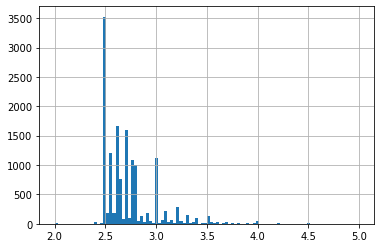

In [4]:
import matplotlib.pyplot as plt
df['ceiling_height'].hist(bins=100, range=(2, 5))



Медианное значение высоты потолков:  2.65


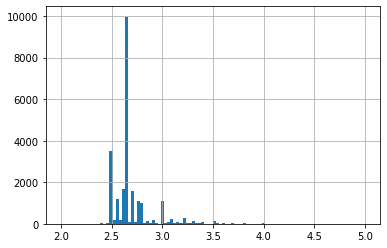

In [5]:
<div style="border:solid orange 2px; padding: 20px"> <h1 style="color:orange; margin-bottom:20px">Комментарий наставника</h1>

Не забывай подписывать оси на графиках и сам график, иначе не залазя в код абсолютно не понятно, что изображеноheight_median=df['ceiling_height'].median()
print('Медианное значение высоты потолков: ',height_median)
df['ceiling_height']=df['ceiling_height'].fillna(height_median)
df['ceiling_height'].hist(bins=100, range=(2, 5))


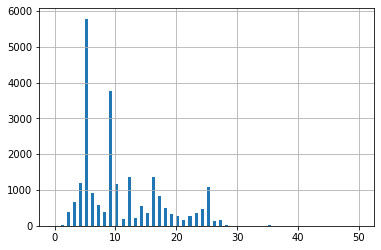

In [6]:
df['floors_total'].hist(bins=100, range=(0, 50))
#по графику видно,что большим спросом пользуются  5,9,12,16,25 этажные дома

In [7]:
df.dropna(subset=['floors_total'], inplace=True)
#тк количество пропущенных значений незначительное,то можно их удалить
df.dropna(subset=['locality_name'], inplace=True)
df['locality_name'] = df['locality_name'].str.lower()
#здесь также удаляем пропущенные значения и приводим названия к нижнему регистру для удоства работы


0    51.00
1    18.60
2    34.30
3    87.45
4    32.00
5    14.40
6    10.60
7    39.38
8    15.43
9    43.60
Name: living_area, dtype: float64

0    25.00
1    11.00
2     8.30
3    23.85
4    41.00
5     9.10
6    14.40
7    18.90
8     8.81
9     6.50
Name: kitchen_area, dtype: float64


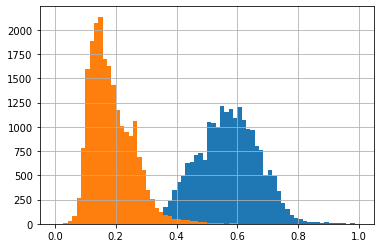

In [8]:
df['mean_living_area']=df['living_area']/df['total_area']
df['mean_kitchen_area']=df['kitchen_area']/df['total_area']

df['mean_living_area'].hist(bins=70, range=(0, 1))
df['mean_kitchen_area'].hist(bins=70, range=(0, 1))
#из выведенных гистограмм видим, что в среднем жилая площадь составлет 55%,а  площадь кухонь 15% от всей площади квартиры
#теперь пропущенные значения в данных столбцах можно заменить на вычисленные процентные соотношения
df['living_area']=df['living_area'].fillna(df['total_area']*0.55)
df['kitchen_area']=df['kitchen_area'].fillna(df['total_area']*0.15)
print(df['living_area'].head(10))
print()
print(df['kitchen_area'].head(10))


In [9]:
#незаполненные поля в числе парко и водоемов в радиусе 3км предполагаю говорят о том,что их нет, поэтому пропущенные значение обнулим
df['parks_around3000']=df['parks_around3000'].replace('Nan').fillna(value='0')
df['parks_around3000']=df['parks_around3000'].astype('int')
df['ponds_around3000']=df['ponds_around3000'].replace('Nan').fillna(value='0')
df['ponds_around3000']=df['ponds_around3000'].astype('int')
df['floors_total']=df['floors_total'].astype('int')
df['rooms']=df['rooms'].astype('int')
# в графе апартаменты заменим пропущенные значения на False, тк скорее всего пропуск говорит о том что жилье таковым не является
df['is_apartment']=df['is_apartment'].replace('Nan').fillna(value='False')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,mean_living_area,mean_kitchen_area
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.00,8,False,...,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11,18.60,1,False,...,посёлок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5,34.30,4,False,...,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14,87.45,9,False,...,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,NaN,NaN
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.00,13,False,...,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,0.320000,0.410000


### Шаг 3. Посчитайте и добавьте в таблицу

In [10]:
df['price_m2']=(df['last_price']/df['total_area']).astype('int')

df.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,mean_living_area,mean_kitchen_area,price_m2
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.00,8,False,...,18863.0,16028.0,1,482.0,2,755.0,NaN,0.472222,0.231481,120370
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11,18.60,1,False,...,12817.0,18603.0,0,NaN,0,NaN,81.0,0.460396,0.272277,82920
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5,34.30,4,False,...,21741.0,13933.0,1,90.0,2,574.0,558.0,0.612500,0.148214,92785
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14,87.45,9,False,...,28098.0,6800.0,2,84.0,3,234.0,424.0,NaN,NaN,408176
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.00,13,False,...,31856.0,8098.0,2,112.0,1,48.0,121.0,0.320000,0.410000,100000


In [11]:
df['first_day_exposition']=pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')
df['week_day'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
df['first_day_exposition'] = df['first_day_exposition'].dt.date

def floor(df):
    if df['floor']==1:
        return 'первый'
    if df['floor']==df['floors_total']:
        return 'последний'
    if 1<df['floor']<df['floors_total']:
        return 'другой'
df['floors_parameter']=df.apply(floor,axis=1)
df.groupby('floors_parameter').agg({'price_m2':'median'})


,price_m2
floors_parameter,
другой,98287.5
первый,81250.0
последний,87763.0


Данные для таблицы посчитаны:
теперь знаем цену за м2
день недели, месяц и год публикации объявления, который удобен к восприятию и чтению;
этаж квартиры: варианты — первый, последний, другой, где мы видим, что квартиры на первом и последнем этаже дешевле,чем остальные.


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

                total_area  last_price     rooms  ceiling_height  price_m2
total_area        1.000000    0.653621  0.758735        0.080765  0.302571
last_price        0.653621    1.000000  0.363191        0.064411  0.736798
rooms             0.758735    0.363191  1.000000        0.047958  0.055680
ceiling_height    0.080765    0.064411  0.047958        1.000000  0.099885
price_m2          0.302571    0.736798  0.055680        0.099885  1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fdfbfd550>,
      dtype=object)

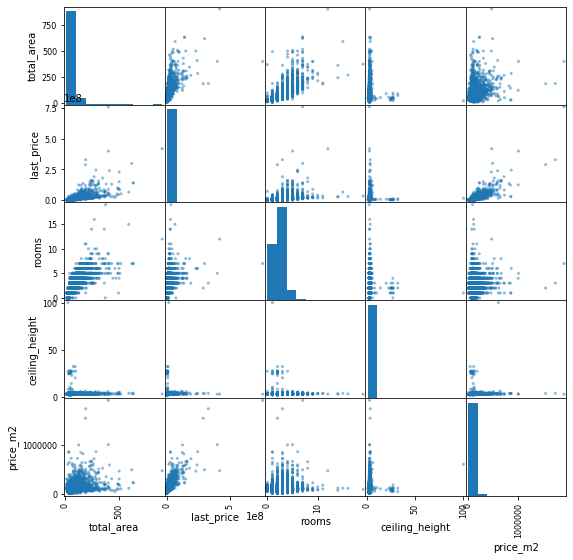

In [31]:
stat_hist=df.loc[:,['total_area', 'last_price', 'rooms', 'ceiling_height','price_m2']]
print(stat_hist.corr())
pd.plotting.scatter_matrix(stat_hist, figsize=(9,9))

Из графиков видно,что:
- с ростом площади растет цена и цена за метр2
- с ростом комнат(до 5) растет цена, а после идет на спад
- высота потолков не сильно влияет на стоимость
- с ростом площади растет количество комнат в квартире
- цена и цена за метр2 растут прямо пропорционально

180.7413945278023
95.0


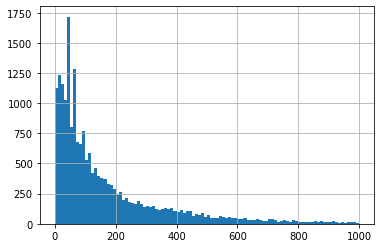

In [13]:
df['days_exposition'].hist(bins=100, range=(0, 1000))
#по графику видно,что основная масса квартиры продается в течение 100 дней, что достаточно быстро.
#квартиры которые продаются более 180 дней или 6 месяцев можно считать продаются долго,исходя из среднего значения времени продажи.
print(df['days_exposition'].mean())
print(df['days_exposition'].median())

AxesSubplot(0.125,0.125;0.775x0.755)


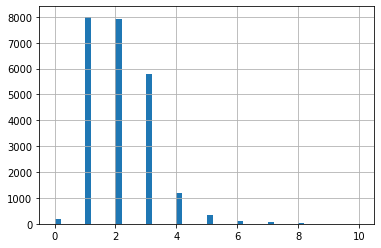

In [14]:
print(df['rooms'].hist(bins=50, range=(0,10)))
#квартиры где больше 8 комнат очень, мало поэтому эти значения можно будет исключить




AxesSubplot(0.125,0.125;0.775x0.755)


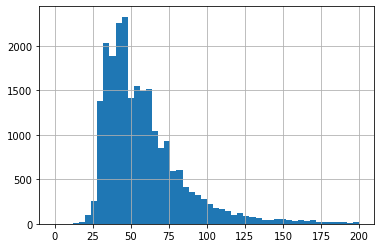

In [15]:
print(df['total_area'].hist(bins=50, range=(0,200)))
#также есть квартиры с маленькой или с очень большой квадратурой, их немного поэтому можно исключить такие значения из нашей базы.

AxesSubplot(0.125,0.125;0.775x0.755)
[  2.7    2.65   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     3.2    2.61   3.25   3.45   2.77   2.85   2.64
   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84   3.1
   2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.     2.58
   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6    2.92
   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53   2.74
   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82   3.54
   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9    3.18
   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83   3.52
   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19   3.24
   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37   3.09
   8.     3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68   3.22
   3.27  27.     4.1    2.93   3.46  24.     3.47   3.33   3.63   3.32
  26.     1.2    8.3    2.98   2.86   3.17

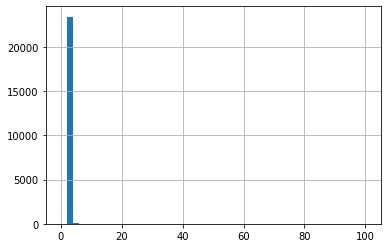

In [16]:
print(df['ceiling_height'].hist(bins=50, range=(0,100)))# график получился мало информативным
print(df['ceiling_height'].unique())#на основе уникальных значений видим, есть аномальные высоты, которые не соответствуют квартирам



In [17]:
good_df=df.query('ceiling_height<6 & 20<total_area<200 & rooms<8')
#print(good_df)
print(len(good_df))

23266


                     last_price     rooms  price_m2  cityCenters_nearest
last_price             1.000000  0.378613  0.798306            -0.275552
rooms                  0.378613  1.000000 -0.004048            -0.166297
price_m2               0.798306 -0.004048  1.000000            -0.332283
cityCenters_nearest   -0.275552 -0.166297 -0.332283             1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fdfa90150>,
      dtype=object)

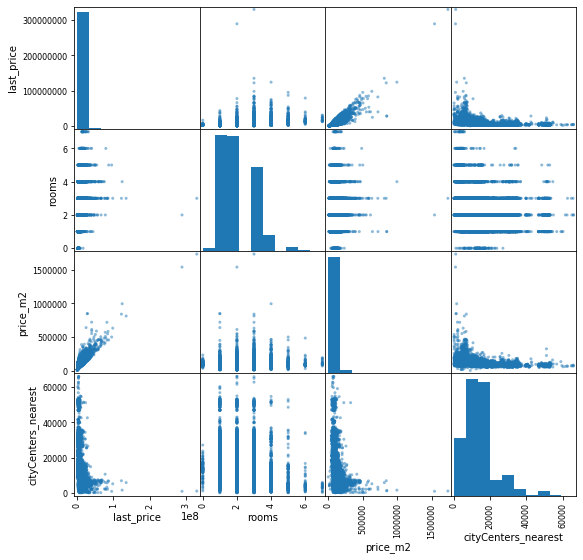

In [18]:
stat_hist_2 = good_df.loc[:, ['last_price', 'rooms', 'price_m2','cityCenters_nearest']]
print(stat_hist_2.corr())
pd.plotting.scatter_matrix(stat_hist_2, figsize=(9, 9))


Чем дальше от центра квартира и чем больше в ней комнат, тем меньше цена.
Другие параметры не сильно влият на стоимость жилья.
Цена за м2 прямо пропорционльно растет с ценой квартиры.
Стоимость в зависимости от количества комнат растет до 3-х комнат далее плавно идет на спад.


                       price_m2
floors_parameter               
другой            102705.450303
первый             81575.354783
последний          90192.231290


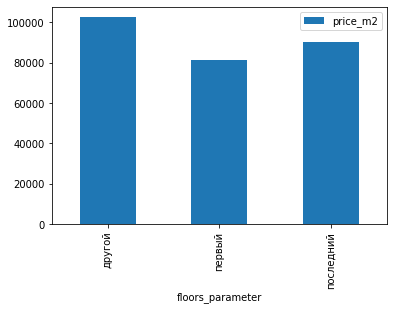

In [19]:
floors_parameter_stat=good_df.pivot_table(index='floors_parameter', values='price_m2')
floors_parameter_stat.plot(y='price_m2', kind='bar')
print(floors_parameter_stat)

              price_m2
week_day              
0         98425.767867
1         98992.583899
2         98587.698944
3         99393.519915
4         97774.253116
5         96749.114451
6         96548.284940


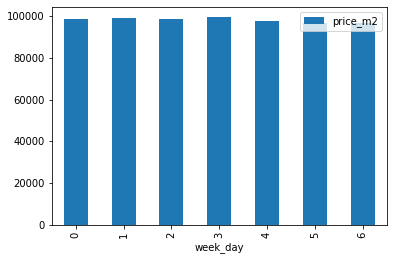

In [20]:
week_day_stat=good_df.pivot_table(index='week_day', values='price_m2')
week_day_stat.plot(y='price_m2', kind='bar')
print(week_day_stat)

            price_m2
month               
1       98508.448700
2       98090.713027
3       98212.365892
4      100646.496134
5       97440.157979
6       96708.836522
7       97532.429692
8       99178.009878
9       99061.270673
10      97213.176414
11      98451.830261
12      98379.202980


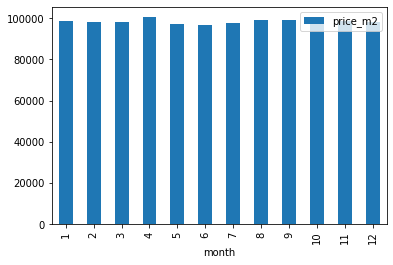

In [21]:
month_stat=good_df.pivot_table(index='month', values='price_m2')
month_stat.plot(y='price_m2', kind='bar')
print(month_stat)

           price_m2
year               
2014  121259.781955
2015  101799.069788
2016   96602.588778
2017   96328.535271
2018   97140.383718
2019  106868.984848


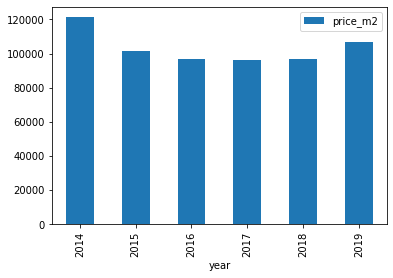

In [22]:
year_stat=good_df.pivot_table(index='year', values='price_m2')
year_stat.plot(y='price_m2', kind='bar')
print(year_stat)


В зависимости от этажа цена квартиры меняется, первые и последние этажи более бюджетные.
День недели размещения объявления не сильно влияет на цену, незначительная разница в 1000р для объявлений в начале недели.
Месяц также незначительно влияет на цены, лишь в апреле видно резкий прирост +2к к стоимости, далее значения возвращаются к прежним значениям.
В зависимости от года видны сильные колебания в 2015 году, предположу, что кризис 2014 повлиял на рынок недвижимости и цены ввиду этого значительно снизились и продолжали до 2017 включительно, в 2019 резкий скачок и  цены возвращаются к прежним значениям.

In [23]:
location_group=good_df.pivot_table(index='locality_name', values='price_m2', aggfunc='count')
print(location_group.sort_values(by='price_m2', ascending=False).head(10))

                   price_m2
locality_name              
санкт-петербург       15390
посёлок мурино          517
посёлок шушары          438
всеволожск              397
пушкин                  363
колпино                 337
посёлок парголово       326
гатчина                 306
деревня кудрово         298
выборг                  237


In [24]:
location_list = ['санкт-петербург',
        'посёлок мурино',
        'посёлок шушары', 
        'всеволожск', 
        'колпино', 
        'пушкин', 
        'посёлок парголово', 
        'деревня кудрово',
        'гатчина',
        'выборг']
location_df = good_df.query('locality_name in @location_list')

location_group = location_df.pivot_table(index='locality_name', values ='price_m2',aggfunc='median')
location_group = location_group.sort_values(by = 'price_m2', ascending = False)
print(location_group)


                   price_m2
locality_name              
санкт-петербург    104625.5
пушкин              99987.0
деревня кудрово     91930.0
посёлок парголово   91779.5
посёлок мурино      85714.0
посёлок шушары      76747.5
колпино             74722.0
гатчина             67860.0
всеволожск          65789.0
выборг              58158.0


Самая высокая стоимость в культурной столице, остальные населенные пункты,расположенные поблизости имеют цены примерно похожие на питерские.
Самая низкая стоимость  в Выборге, т.к. он маскимально удален от Петербурга.
Чем ближе населенные пункт к Петербургу и имеют удобный въезд в город, тем выше может быть цена.

                        price_m2
cityCenters_nearest_km          
0.0                     155529.0
1.0                     126036.0
2.0                     121591.5
3.0                     108139.0
4.0                     117692.0
5.0                     126923.0
6.0                     129960.5
7.0                     125627.0
8.0                     122549.0
9.0                     105714.0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


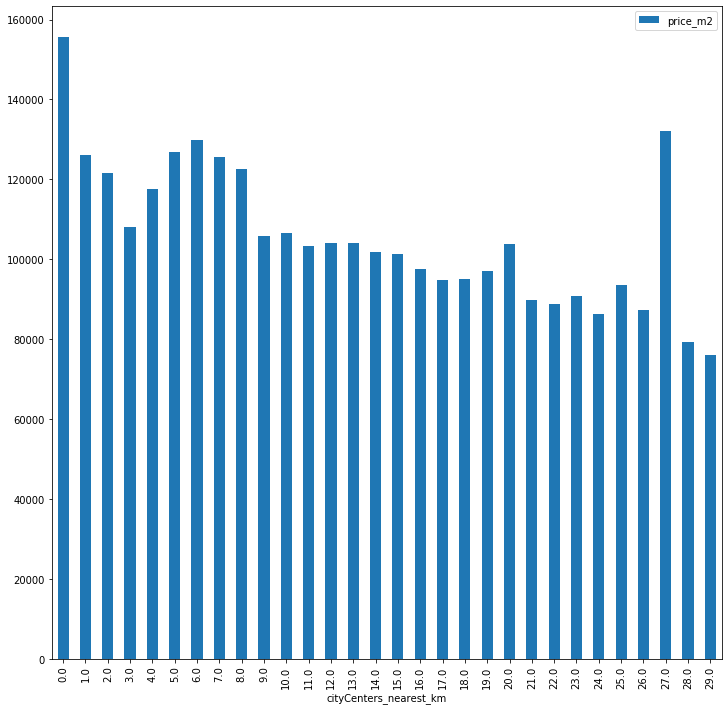

In [25]:
good_df['cityCenters_nearest_km']=round(good_df['cityCenters_nearest']/1000)
spb_group=good_df.query('"санкт-петербург" in locality_name')
spb_group_center=spb_group.pivot_table(index='cityCenters_nearest_km',values='price_m2',aggfunc='median')
spb_group_center.plot(y='price_m2', kind='bar',figsize=(12, 12))
print(spb_group_center.head(10))

Судя по графику,можно сделать вывод, что центральная зона находится в пределах 8км.
8км является центральной зоной, далее видим сильный спад цены.

                total_area  last_price     rooms  ceiling_height
total_area        1.000000    0.567712  0.774558        0.253430
last_price        0.567712    1.000000  0.281622        0.144186
rooms             0.774558    0.281622  1.000000        0.210649
ceiling_height    0.253430    0.144186  0.210649        1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fe816d4d0>,
      dtype=object)

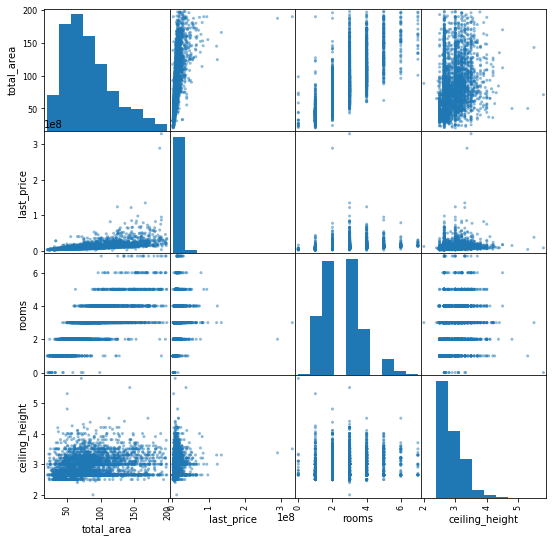

In [26]:
spb_group=spb_group.query('cityCenters_nearest_km<=8')
#print(spb_group)
spb_group_center_2=spb_group.loc[:,['total_area', 'last_price', 'rooms', 'ceiling_height']]
print(spb_group_center_2.corr())
pd.plotting.scatter_matrix(spb_group_center_2, figsize=(9,9))


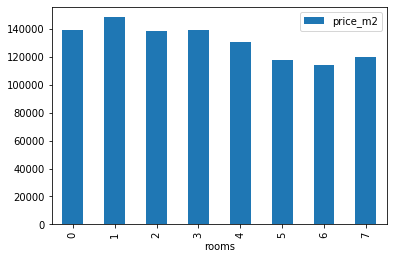

In [27]:
room_stat=spb_group.pivot_table(index='rooms', values='price_m2')
room_stat.plot(y='price_m2', kind='bar')

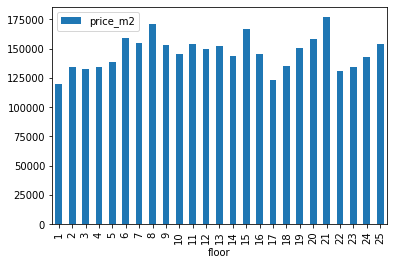

In [28]:
floor_stat=spb_group.pivot_table(index='floor', values='price_m2')
floor_stat.plot(y='price_m2', kind='bar')


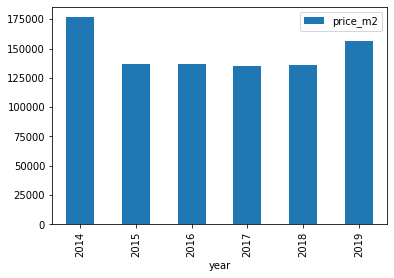

In [29]:
exposition_stat=spb_group.pivot_table(index='year', values='price_m2')
exposition_stat.plot(y='price_m2',kind='bar')

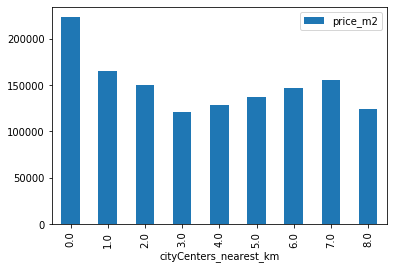

In [30]:
nearest_stat=spb_group.pivot_table(index='cityCenters_nearest_km', values='price_m2')
nearest_stat.plot(y='price_m2', kind='bar')

Число комнат и высота потолков растет до 3-х комнат, после 3-х комнатных квартир видим спад цены и уменьшение высот потолков.
Этаж также влияет на цену, с ростом этажа цена растет с неболшими перепадами. Чем больше этажность, тем дороже стоит последний этаж.
Приближенность к центру сильно имеет роль для домов находящихся в самом центре, по мере удаления от него идет спад.
Чем больше площадь, тем выше потолки



### Шаг 5. Общий вывод

Зависимость основных параметров квартир:
- первый и последний этаж являются наиболее бюджетными, 
- с ростом цены цена за метр растет
- удаленность от центра ведет к снижению стоимости
- с увеличением количества комнат растет цена
- с ростом площади растет цена и цена за метр2
- с ростом комнат(до 5) растет цена, а после идет на спад
- высота потолков не сильно влияет на стоимость
- с ростом площади растет количество комнат в квартире
- цена и цена за метр2 растут прямо пропорционально
Продажа квартиры занимает примерно 100 дней или 3 месяца.
Чем дальше от центра квартира и чем больше в ней комнат, тем меньше цена.
Цена за м2 прямо пропорционльно растет с ценой квартиры.
Стоимость в зависимости от количества комнат растет  далее плавно идет на спад.
В зависимости от этажа цена квартиры меняется, первые и последние этажи более бюджетные.
День недели и месяц размещения объявления не сильно влияет на цену.
Лишь в зависимости от года видны сильные колебания причиной которой могут быть кризис и низкий спрос на жилье в этот период.
Самая высокая стоимость  в культурной столице, остальные населенные пункты,расположенные поблизости имеют цены примерно похожие на питерские. Самая низкая стоимость в Выборге, т.к. он маскимально удален от Петербурга. Чем ближе населенные пункт к Петербургу и имеют удобный въезд в город, тем выше может быть цена.

Анализ центра Петербурга:
На основании анализа графиков сделан вывод,что 8км является центральной зоной, далее видим сильный спад цены, что и показывает о конце центральной границы. 
Число комнат и высота потолков растет до 3-х комнат, после видим спад цены и уменьшение высот потолков.
Этаж также влияет на цену, с ростом этажа цена растет с неболшими перепадами. Чем больше этажность, тем дороже стоит последний этаж. Причиной этому могут быть наценка на красивые виды центра Петербурга.
Приближенность к центру сильно имеет роль для домов находящихся в самом центре, по мере удаления от него идет спад.
Чем больше площадь, тем выше потолки.

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод